Michelle Hu  
---
University of Washington  
AMATH 563  
Homework 2  
Due: May 2, 2020  

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
wd = "/mnt/Backups/jmhu"

data_dir = wd + "/git_dirs/ComplexSystems_AMATH563/hw2/data/"
model_dir = wd + "/git_dirs/ComplexSystems_AMATH563/hw2/models/"
fig_dir = wd + "/git_dirs/ComplexSystems_AMATH563/hw2/figures/"
    
if not os.path.exists(data_dir):
    !mkdir $data_dir

if not os.path.exists(model_dir):
    !mkdir $model_dir

if not os.path.exists(fig_dir):
    !mkdir $fig_dir

In [4]:
df = pd.read_csv(data_dir+"population_data.csv"
                )

In [5]:
df.head()

,Year,Hare,Lynx
0,1845,20,32
1,1847,20,50
2,1849,52,12
3,1851,83,10
4,1853,64,13


### Question 1. Find best fit nonlinear, dynamical systems model to the data using sparse regression
nonlinear = not linear  
best = lowest error, highest accuracy  
sparse = fewest model terms, (L1 regularization)  

### Test

Eigenvalue 1.0156991436948506: distance from unit circle 0.031644750502452856
Eigenvalue 0.014681503925691688: distance from unit circle 0.9997844534424799


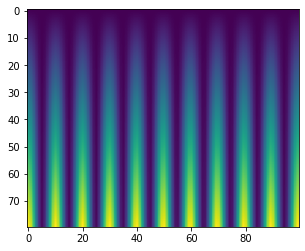

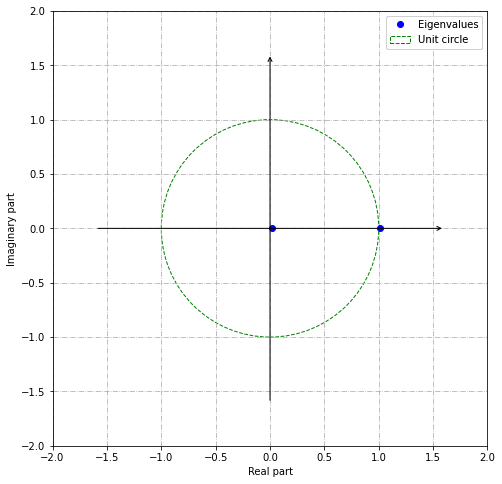

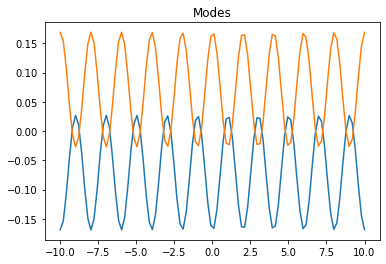

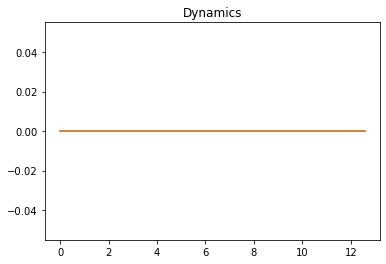

In [6]:
x=np.linspace(-10,10,100)
t=np.linspace(0,4*np.pi, 80)

[X, T]=np.meshgrid(x, t)

f1=(80*np.cos(np.pi*x)+75)*T  # hare
f2=(30*np.sin(np.pi*x-5)+40)*T # lynx
f=f1+f2

plt.imshow(f)

def f1(X,T):
    return((80*np.cos(np.pi*X)+75)*T)
def f2(X,T):
    return((30*np.sin(np.pi*X-5)+4)*T)

xgrid, tgrid = np.meshgrid(x, t)

X1 = f1(xgrid, tgrid)
X2 = f2(xgrid, tgrid)
X = X1 + X2


from pydmd import DMD
dmd = DMD(svd_rank=2)
dmd.fit(X.T)

for eig in dmd.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(eig.imag**2+eig.real**2 - 1)))

dmd.plot_eigs(show_axes=True, show_unit_circle=True)

for mode in dmd.modes.T:
    plt.plot(x, mode.real)
    plt.title('Modes')
plt.show()

for dynamic in dmd.dynamics:
    plt.plot(t, dynamic.real)
    plt.title('Dynamics')
plt.show()

### Real data - guessing coefficients

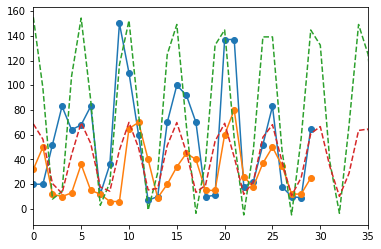

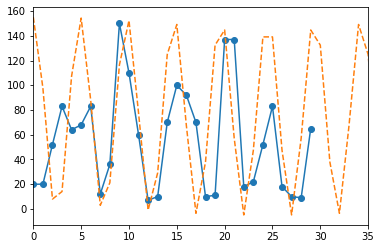

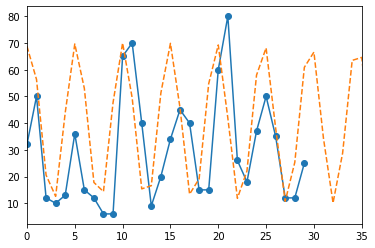

In [7]:
plt.figure(1)
df.Hare.plot(marker='o')
df.Lynx.plot(marker='o')

x=np.linspace(-10,10,50)

f1=80*np.cos(np.pi*x)+75
f2=30*np.sin(np.pi*x-5)+40

plt.plot(f1, "--")
plt.plot(f2, "--")

plt.xlim(0,35);


plt.figure(2)
df.Hare.plot(marker='o')
plt.plot(f1, "--")
plt.xlim(0,35);



plt.figure(3)
df.Lynx.plot(marker='o')
plt.plot(f2, "--")
plt.xlim(0,35);

### SVD and DMD two ways

(29, 29)


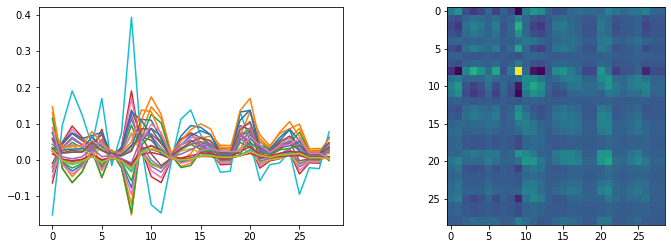

In [8]:
# From scratch
arr=df.values[:, 1:]
X=arr[:-1, :]
Xprime=arr[1:, :]

# Compute directly with observations because there are only 30
A = Xprime @ np.linalg.pinv(X)

print(A.shape)

fig, ax=plt.subplots(1,2, figsize=(12, 4))
ax[0].plot(A);
ax[1].imshow(A);

(29, 2) (29, 2)
(29, 29)


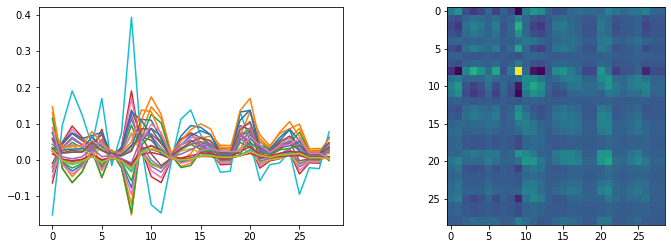

In [9]:
# From scratch
arr=df.values[:, 1:3]
# arr=np.expand_dims(arr,1)

X=arr[:-1, :]
Xprime=arr[1:, :]
print(X.shape, Xprime.shape)
# Compute directly with observations because there are only 30
A = Xprime @ np.linalg.pinv(X)

print(A.shape)

fig, ax=plt.subplots(1,2, figsize=(12, 4))
ax[0].plot(A);
ax[1].imshow(A);

(29, 29) (29,) (29, 29)


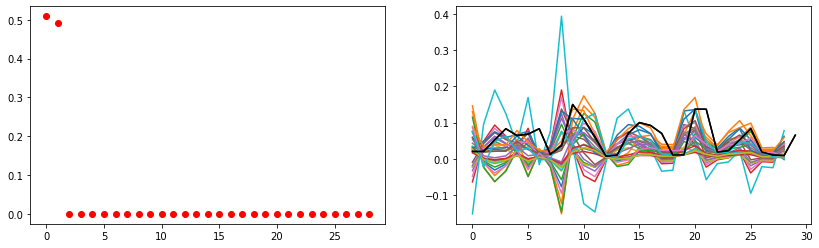

In [10]:
# Using SVD
u, s, v = np.linalg.svd(A)
print(u.shape, s.shape, v.shape)

# eigenvectors of AhA = rows of v
# eigenvectors of AAh = cols of u

# eigenvalues = s**2
fig, ax = plt.subplots(1,2, figsize=(14, 4))
ax[0].plot(np.diag(np.diagflat(s)/np.sum(np.diagflat(s))), "ro");

ax[1].plot(A);
(df.Hare/1000).plot(c="k", ax=ax[1])

ax[1].plot(np.diag(A));
(df.Hare/1000).plot(c="k")

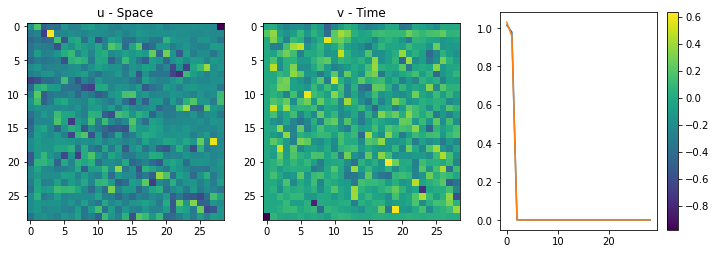

In [12]:
# Plot "space" and time components
fig, ax=plt.subplots(1, 3, figsize=(12, 4))
space=ax[0].imshow(u);
ax[0].set_title("u - Space")
time=ax[1].imshow(v);
ax[1].set_title("v - Time");
fig.colorbar(time);
ax[2].plot(s);
ax[2].plot(s**2)

Eigenvalue (0.6035910520678354+0j): distance from unit circle 0.6356778418636437
Eigenvalue (0.39987097954779155+0j): distance from unit circle 0.8401031997154896
Eigenvalue (0.005745906755980851+0j): distance from unit circle 0.9999669845555516
Eigenvalue (-0.1201037046386996+0.049427108455837185j): distance from unit circle 0.9831320610817549
Eigenvalue (-0.1201037046386996-0.049427108455837185j): distance from unit circle 0.9831320610817549


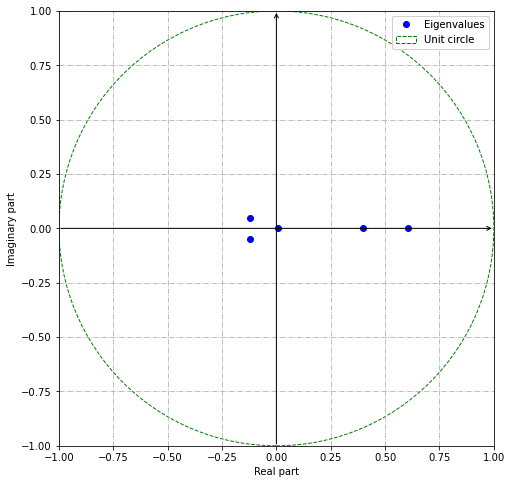

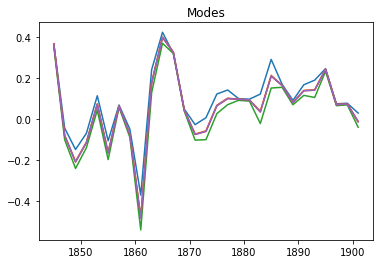

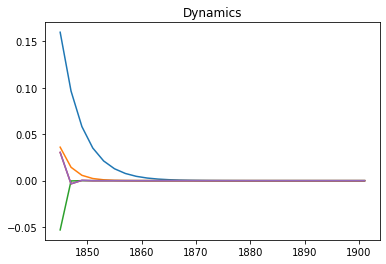

In [12]:
# Using DMD package
from pydmd import DMD

dmd = DMD(svd_rank=5)
dmd.fit(A)

for eig in dmd.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(eig.imag**2+eig.real**2 - 1)))

dmd.plot_eigs(show_axes=True, show_unit_circle=True)

for mode in dmd.modes.T:
    plt.plot(df.Year.values[:-1], mode.real)
    plt.title('Modes')
plt.show()

for dynamic in dmd.dynamics:
    plt.plot(df.Year.values[:-1], dynamic.real)
    plt.title('Dynamics')
plt.show()

In [13]:
# compare eigenvalues
print("SVD:", s[:2]**2)
print("DMD:", dmd.eigs.real)

SVD: [1.02955677 0.95641801]
DMD: [ 0.60359105  0.39987098  0.00574591 -0.1201037  -0.1201037 ]


In [14]:
# DMD function from book
def DMD(X,Xprime,r):
    U,Sigma,VT = np.linalg.svd(X,full_matrices=0) # Step 1
    Ur = U[:,:r]
    Sigmar = np.diag(Sigma[:r])
    VTr = VT[:r,:]
    Atilde = np.linalg.solve(Sigmar.T,(Ur.T @ Xprime @ VTr.T).T).T # Step 2
    Lambda, W = np.linalg.eig(Atilde) # Step 3
    Lambda = np.diag(Lambda)
    
    Phi = Xprime @ np.linalg.solve(Sigmar.T,VTr).T @ W # Step 4
    alpha1 = Sigmar @ VTr[:,0]
    b = np.linalg.solve(W @ Lambda,alpha1)
    return Phi, Lambda, b

In [15]:
X=df.Hare.values[:-1]
X=np.expand_dims(X, 1)

Xprime=df.Hare.values[1:]
Xprime=np.expand_dims(Xprime, 1)


Y=df.Lynx.values[:-1]
Y=np.expand_dims(Y, 1)

Yprime=df.Lynx.values[1:]
Yprime=np.expand_dims(Yprime, 1)


print(X.shape, Xprime.shape, Y.shape, Yprime.shape)

(29, 1) (29, 1) (29, 1) (29, 1)


In [16]:
# DMD both series
# Phi = eigenfunctions
# Lambda = eigenvalues

# Particular solution
# x = b*Phi*e**lambda*t

Phi_X, Lambda_X, b_X = DMD(X.T, Xprime.T, 28)
Phi_Y, Lambda_Y, b_Y = DMD(Y.T, Yprime.T, 28)

In [17]:
print(b_X.shape, Phi_X.shape, Lambda_X.shape)
print(b_Y.shape, Phi_Y.shape, Lambda_Y.shape)

(1,) (1, 1) (1, 1)
(1,) (1, 1) (1, 1)


In [18]:
print(b_X, Phi_X, Lambda_X)
print(b_Y, Phi_Y, Lambda_Y)

[-26.78201147] [[-0.7467699]] [[0.7467699]]
[-40.73468038] [[-0.7855714]] [[0.7855714]]


In [19]:
# Initial values (timestep = 0)
t=0

print(df.values[t][1:])
print("\n")

print(Phi_X*np.exp(Lambda_X*t)*b_X)
print(Phi_X*b_X)
print("\n")

print(Phi_Y*np.exp(Lambda_Y*0)*b_Y)
print(Phi_Y*b_Y)

[20 32]


[[20.]]
[[20.]]


[[32.]]
[[32.]]


In [20]:
# Initial values (timestep = 0)
t=1

print(df.values[t][1:])
print("\n")

print(Phi_X*np.exp(Lambda_X*t)*b_X, Phi_Y*np.exp(Lambda_Y*0)*b_Y)

[20 50]


[[42.2034585]] [[32.]]


In [21]:
(Phi_X*np.exp(Lambda_X*t)*b_X).shape

(1, 1)

In [22]:
hares_dmd=[]
lynx_dmd=[]

years = df.Year.values

# Calculate DMD-derived populations
for t in range(len(years)):
    hares_dmd.append(Phi_X*np.exp(Lambda_X*t)*b_X)
    lynx_dmd.append(Phi_Y*np.exp(Lambda_Y*t)*b_Y)
    
# Convert to arrays and remove singleton dimensions
hares_dmd = np.array([int(h) for h in hares_dmd]).squeeze()
lynx_dmd = np.array([int(l) for l in lynx_dmd]).squeeze()

### Package DMD tutorial example

Eigenvalue (0.9904953470777571+0.1375462373797003j): distance from unit circle 6.661338147750939e-16
Eigenvalue (0.9935834726096825+0.11310120669950192j): distance from unit circle 7.771561172376096e-16


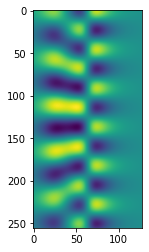

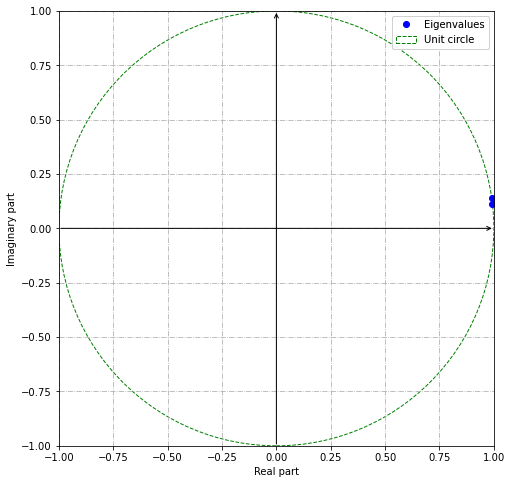

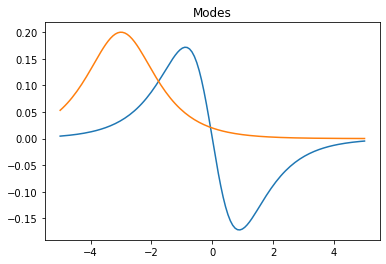

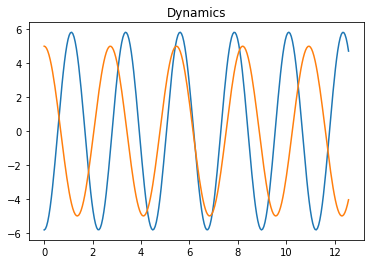

In [23]:
def f1(x,t): 
    return 1./np.cosh(x+3)*np.exp(2.3j*t)

def f2(x,t):
    return 2./np.cosh(x)*np.tanh(x)*np.exp(2.8j*t)

x = np.linspace(-5, 5, 128)
t = np.linspace(0, 4*np.pi, 256)

xgrid, tgrid = np.meshgrid(x, t)

X1 = f1(xgrid, tgrid)
X2 = f2(xgrid, tgrid)
X = X1 + X2

plt.imshow(X.real)

from pydmd import DMD
dmd = DMD(svd_rank=2)
dmd.fit(X.T)

for eig in dmd.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(eig.imag**2+eig.real**2 - 1)))

dmd.plot_eigs(show_axes=True, show_unit_circle=True)

for mode in dmd.modes.T:
    plt.plot(x, mode.real)
    plt.title('Modes')
plt.show()

for dynamic in dmd.dynamics:
    plt.plot(t, dynamic.real)
    plt.title('Dynamics')
plt.show()

authors said that SINDY + control worked better and SINDY alone  
dx/dt = f(x, u)

Lotka-Volterra Predator-Prey Model  
dx1/dt = ax1 - bx1x2 + u^2  
dx2/dt = -cx2 + dx1x2  
with x1 = hare population  
and x2 = lynx population

authros used u(t) = 2sin(t) + 2sin(t/10)  
using 100 timesteps (t) for training and 100 time steps (t) for validation

#### Check with interpolated points

In [24]:
def densify(t, y, dt):
    from scipy.interpolate import interp1d
    f = interp1d(t, y, kind='cubic')
    tnew = np.arange(t[0], t[-1], dt)
    ynew = f(tnew)
    return(tnew, ynew)

In [25]:
make_it_dense = 5

# For DMD with interpolation
t = df.Year.values
dt = (t[1] - t[0])/make_it_dense # make 100 times more points

# Interpolate for more points
years, dense_hare = densify(t, df.Hare.values, dt)
years, dense_lynx = densify(t, df.Lynx.values, dt)

X_dense = np.stack((dense_hare, dense_lynx)).T # in form time, states

# DMD dense set-up
X = X_dense[:-1,:]
Xprime = X_dense[1:,:]

A = Xprime @ np.linalg.pinv(X)

(144, 144) (144,) (144, 144)


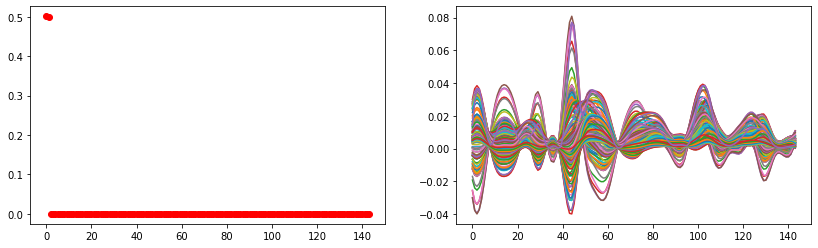

In [26]:
# Using SVD
u, s, v = np.linalg.svd(A)
print(u.shape, s.shape, v.shape)

# eigenvectors of AhA = rows of v
# eigenvectors of AAh = cols of u

# eigenvalues = s**2
fig, ax = plt.subplots(1,2, figsize=(14, 4))
ax[0].plot(np.diag(np.diagflat(s)/np.sum(np.diagflat(s))), "ro");

ax[1].plot(A);
# (df.Hare/1000).plot(c="k", ax=ax[1])

ax[1].plot(np.diag(A));
# (df.Hare/1000).plot(c="k")